In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import time

%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [13]:
%%cython
import numpy as np
cimport numpy as np
from cpython cimport array
import array


def purify(np.ndarray[int, ndim=3] img):
    cdef np.ndarray[int, ndim=1] vv=np.zeros((2, ), dtype='int32')
    cdef np.ndarray[int, ndim=1] z=np.zeros((2, ), dtype='int32')
    cdef np.ndarray[int, ndim=2] t=np.zeros((4, 2), dtype='int32')
    
    
    cdef np.ndarray[int, ndim=3] img2=np.zeros((img.shape[0], img.shape[1], 3), dtype='int32')
    cdef np.ndarray[int, ndim=2] check=np.zeros((img.shape[0], img.shape[1]), dtype='int32')
    cdef np.ndarray[int, ndim=2] ch2=np.zeros((img.shape[0], img.shape[1]), dtype='int32')
    cdef np.ndarray[int, ndim=2] F=np.zeros((img.shape[0]*img.shape[1]*3, 2), dtype='int32')
    cdef int iF=0, jF=1, i=0, j=0, ij=0, summ=0
    
    
    vv[0]=img.shape[0]
    vv[1]=img.shape[1]
    F[0][0]=0
    F[0][1]=0
    
    for i in range(0, vv[0]):
        for j in range(0, vv[1]):
            img2[i,j,0]=img[i,j,0]
            img2[i,j,1]=img[i,j,1]
            img2[i,j,2]=img[i,j,2]    
    
    while (iF<jF):
        z[0]=F[iF,0]
        z[1]=F[iF,1]
        
        t[0,0]=z[0]-1
        t[0,1]=z[1]
        
        t[1,0]=z[0]
        t[1,1]=z[1]-1
        
        t[2,0]=z[0]+1
        t[2,1]=z[1]
        
        t[3,0]=z[0]
        t[3,1]=z[1]+1
        
        if (z[0]>0 and img2[t[0,0],t[0,1],0]==0 and check[t[0,0],t[0,1]]==0):
            F[jF,0]=t[0,0]
            F[jF,1]=t[0,1]
            check[t[0,0],t[0,1]]=1
            jF+=1
            
        if (z[1]>0 and img2[t[1,0],t[1,1],0]==0 and check[t[1,0],t[1,1]]==0):
            F[jF,0]=t[1,0]
            F[jF,1]=t[1,1]
            check[t[1,0],t[1,1]]=1
            jF+=1
            
        if (z[0]+1<vv[0] and img2[t[2,0],t[2,1],0]==0 and check[t[2,0],t[2,1]]==0):
            F[jF,0]=t[2,0]
            F[jF,1]=t[2,1]
            check[t[2,0],t[2,1]]=1
            jF+=1
            
        if (z[1]+1<vv[1] and img2[t[3,0],t[3,1],0]==0 and check[t[3,0],t[3,1]]==0):
            F[jF,0]=t[3,0]
            F[jF,1]=t[3,1]
            check[t[3,0],t[3,1]]=1
            jF+=1
        
        iF+=1
    
    for i in range(0, vv[0]):
        for j in range(0, vv[1]):            
            if (img2[i,j,0]==255 and ch2[i,j]==0):
                F[0,0]=i
                F[0,1]=j
                
                iF=0
                jF=1
                while (iF<jF):
                    
                    z[0]=F[iF,0]
                    z[1]=F[iF,1]

                    t[0,0]=z[0]-1
                    t[0,1]=z[1]

                    t[1,0]=z[0]
                    t[1,1]=z[1]-1

                    t[2,0]=z[0]+1
                    t[2,1]=z[1]

                    t[3,0]=z[0]
                    t[3,1]=z[1]+1
                    
                    if (z[0]>0 and ch2[t[0,0],t[0,1]]==0 and check[t[0,0],t[0,1]]==0):
                        F[jF,0]=t[0,0]
                        F[jF,1]=t[0,1]
                        ch2[t[0,0],t[0,1]]=1
                        jF+=1

                    if (z[1]>0 and ch2[t[1,0],t[1,1]]==0 and check[t[1,0],t[1,1]]==0):
                        F[jF,0]=t[1,0]
                        F[jF,1]=t[1,1]
                        ch2[t[1,0],t[1,1]]=1
                        jF+=1

                    if (z[0]+1<vv[0] and ch2[t[2,0],t[2,1]]==0 and check[t[2,0],t[2,1]]==0):
                        F[jF,0]=t[2,0]
                        F[jF,1]=t[2,1]
                        ch2[t[2,0],t[2,1]]=1
                        jF+=1

                    if (z[1]+1<vv[1] and ch2[t[3,0],t[3,1]]==0 and check[t[3,0],t[3,1]]==0):
                        F[jF,0]=t[3,0]
                        F[jF,1]=t[3,1]
                        ch2[t[3,0],t[3,1]]=1
                        jF+=1
                    
                    iF+=1
                
                if (jF<4000):
                    summ+=jF
                    for jj in range(0, jF):
                        img2[F[jj,0],F[jj,1],0]=0
                        img2[F[jj,0],F[jj,1],1]=0
                        img2[F[jj,0],F[jj,1],2]=0
                #Pouring colors upon blackening world
                else:
                    for jj in range(0, jF):
                        img2[F[jj,0],F[jj,1],0]=255
                        img2[F[jj,0],F[jj,1],1]=255
                        img2[F[jj,0],F[jj,1],2]=255
    return img2

In [14]:
f=[0]*21
for i in range(21):
    v=str(i)
    v=v if (len(v)==2) else '0'+v
    f[i]=cv.imread(r'/home/sebastian/Downloads/smieci/obrazkowe_smieci/samolot'+v+'.jpg', cv.IMREAD_COLOR)[...,::-1]/255

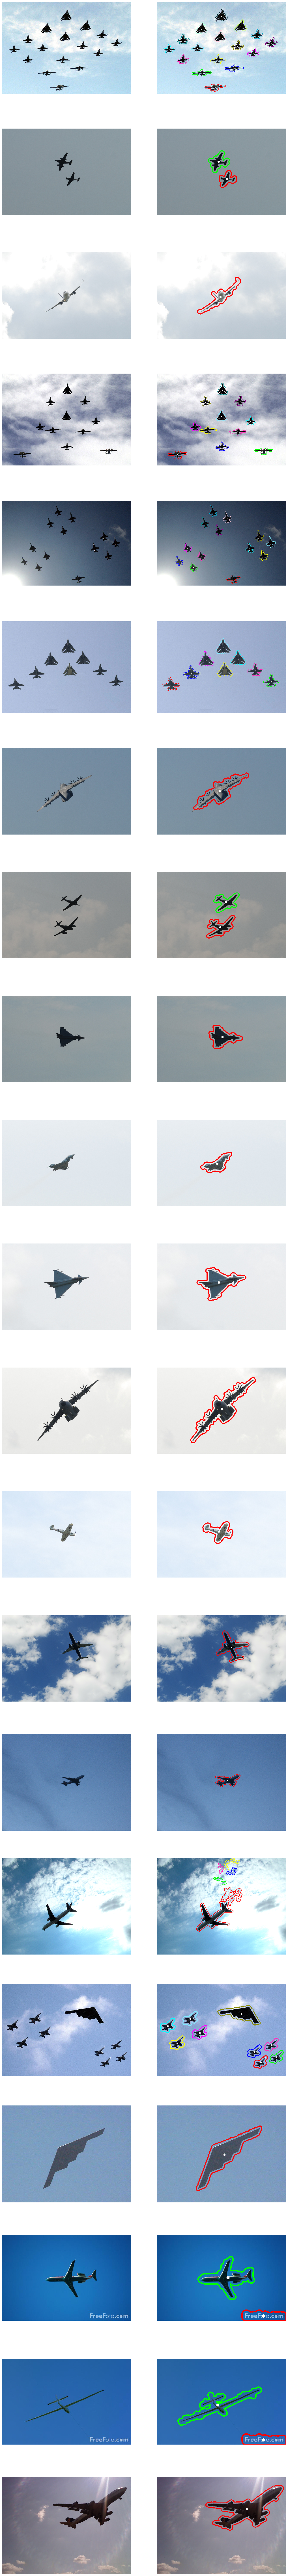

15.732020378112793


In [17]:
def colortotuple(x):
    r=int(x[1:3], 16)
    g=int(x[3:5], 16)
    b=int(x[5:7], 16)
    
    return (r, g, b)


t1=time.time()
ss=21

fig, ax=plt.subplots(ss,2,figsize=(18,8*ss))

kernel1=np.asarray([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
kernel2=np.asarray([[0, 1, 0], [1,-4,1], [0, 1, 0]])
kernel3=np.asarray([[0, 1, 0], [1,-5,1], [0, 1, 0]])
kernel4=(1/9)*np.asarray([[1, 1, 1], [1,1,1], [1, 1, 1]])
kernel5=(1/16)*np.asarray([[1, 2, 1], [2,4,2], [1, 2, 1]])
kernel6=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])

g=[0]*21
em=[0]*21
palette=['#FF0101', '#01FF01', '#0101FF', '#FF33BB',
        '#FFFF01', '#FF01FF', '#01FFFF', '#80EAFF',
        '#888801', '#880188', '#018888', '#FFCCDD',
        '#01AACC', '#BFFFE5', '#C4FF4D', '#012B33']
p2=[colortotuple(x) for x in palette]

for i in range(21):
    em[i]=f[i]*0
    
    #imgray = cv.cvtColor(f[i], cv.COLOR_BGR2GRAY)
    mg=cv.filter2D(f[i], -1, kernel6)
    im2=cv.filter2D(mg, -1, kernel2)
    ret, thresh = cv.threshold(im2, 0.035, 1, 0)
    
    thresh=(thresh*255).astype('uint8')
    imgray = cv.cvtColor(thresh, cv.COLOR_BGR2GRAY)    
    _, contours, hierarchy = cv.findContours(imgray, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(em[i], contours, -1, (255,255,255), 24)
    em[i]=em[i].astype('uint8')
    
    ax[i][0].imshow(f[i])
    ax[i][0].axis('off')
    
    em2=purify(em[i].astype('int32')).astype('uint8')
    #em2 = cv.fastNlMeansDenoisingColored(em[i],None,20,10,7,21)
    
    em2=cv.cvtColor(em2, cv.COLOR_BGR2GRAY);
    _, contours, hierarchy = cv.findContours(em2, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
    
    g[i]=f[i].copy()
    for jj in range(0, len(contours)):
        em2=np.zeros((f[i].shape[0], f[i].shape[1], 3), dtype='int32')
        cv.drawContours(em2, [contours[jj]], -1, p2[jj], 6)
        M = cv.moments(contours[jj])
        
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv.circle(em2, (cX, cY), 7, (255, 255, 255), -1)
        
        em2=em2.astype('float64')/255
        g[i][em2>0]=em2[em2>0]
        
    ax[i][1].imshow(g[i])
    ax[i][1].axis('off')
    
plt.show()
t2=time.time()
print(t2-t1)

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


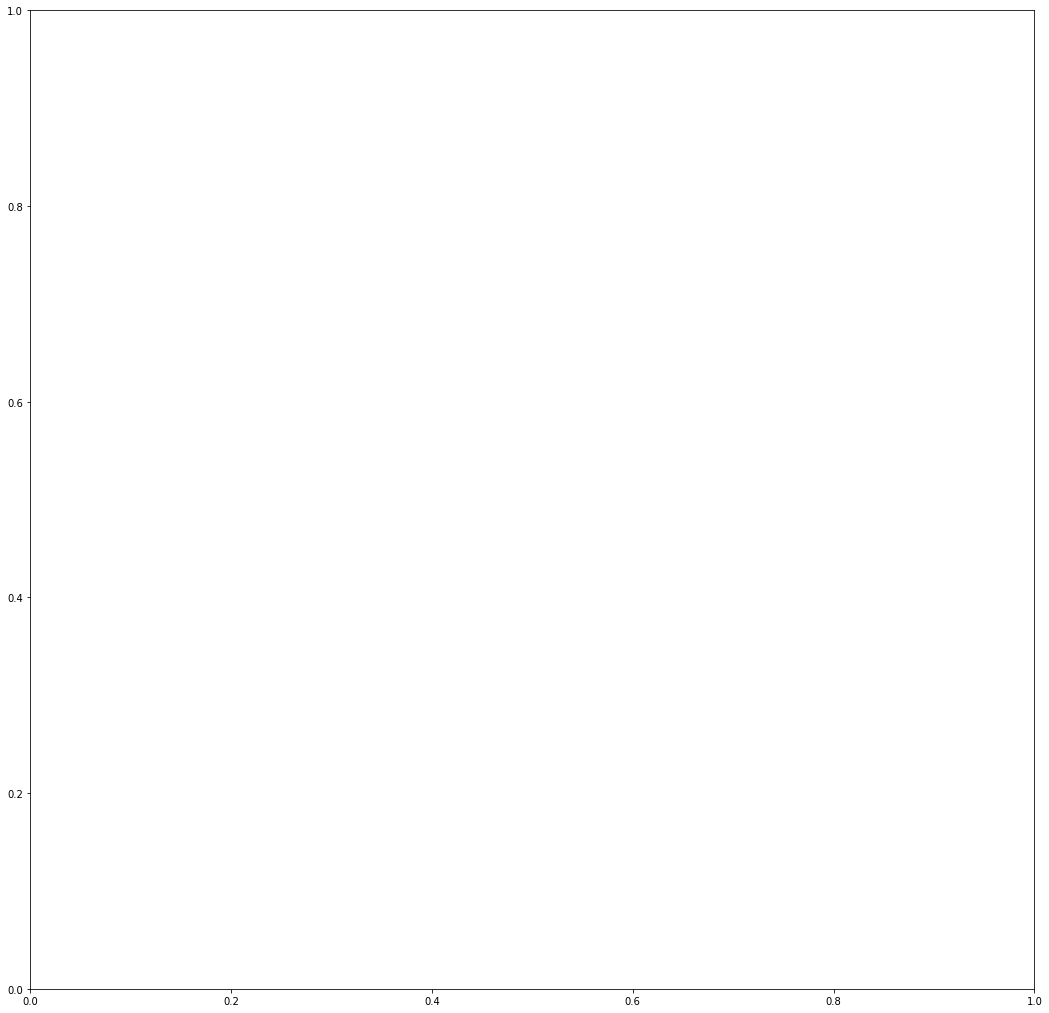

In [137]:
#Efektywne pływy informacyji:
#1) Box blur -> Edge detection (-4) -> threshold transformation(0.04) -> grayening -> finding contours & contouring
#13 depth -> purification -> grayening -> finding contours & contouring, 6 depth
#2) Box blur -> Edge detection (G5) -> threshold transformation(0.035)-> grayening -> finding contours & contouring
#24 depth -> purification -> grayening -> finding contours & contouring, 6 depth







i=16

mg=f[i]/255

#imgray = cv.cvtColor(src=mg, code=cv.COLOR_BGR2GRAY)
#thresh = cv.adaptiveThreshold(imgray, 250, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 7, 1)

kernel1=np.asarray([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
kernel2=np.asarray([[0, 1, 0], [1,-4,1], [0, 1, 0]])
kernel3=np.asarray([[0, 1, 0], [1,-5,1], [0, 1, 0]])
kernel4=(1/9)*np.asarray([[1, 1, 1], [1,1,1], [1, 1, 1]])

mg=cv.filter2D(mg, -1, kernel4)
im2=cv.filter2D(mg, -1, kernel2)

fig, ax=plt.subplots(1,1,figsize=(18,18))
rt, thr = cv.threshold(im2, 0.05, 1, 0)

_, contours, hierarchy = cv.findContours(thr, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(em, contours, -1, (255,255,255), 3)

ax.imshow(em)
plt.show()

In [195]:
help(cv.findContours)

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> image, contours, hierarchy
    .   @brief Finds contours in a binary image.
    .   
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .   
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
    .   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
   

In [20]:
print(em[1][(em[1]>0) & (em[1]<255)])

[]


In [24]:
print(em[1][0,0,1])

0


In [36]:
s=(1,1)
vv=np.asarray([[1,2],[3,4]])
print(vv[s])

4


In [34]:
kv=np.asarray([[0,1,0],[0,1,2],[3,4,5]])
kv[1,2]=5555
print(kv[1,2])

5555


In [31]:
def minipure(img):
    vv=img.shape
    img2=img.copy()
    
    for i in range(vv[0]):
        for j in range(vv[1]):
            if (img2[i,j,0]==0 or img2[i,j,1]==0 or img2[i,j,2]==0):
                img2[i,j]=[0,0,0]
    return img2
    

def purify(img):
    vv=img.shape
    img2=img.copy()
    check=img2*0
    ch2=img2*0
    
    
    F=[0]*(vv[0]*vv[1])
    iF, jF=0,1
    F[0]=(0,0)
    
    while (iF<jF):
        z=F[iF]
        t1=(z[0]-1, z[1], 0)
        t2=(z[0], z[1]-1, 0)
        t3=(z[0]+1, z[1], 0)
        t4=(z[0], z[1]+1, 0)
        
        if (z[0]>0 and img2[t1]==0 and check[t1]==0):
            F[jF]=t1
            check[t1]=1
            jF+=1
        if (z[1]>0 and img2[t2]==0 and check[t2]==0):
            F[jF]=t2
            check[t2]=1
            jF+=1
        if (z[0]+1<vv[0] and img2[t3]==0 and check[t3]==0):
            F[jF]=t3
            check[t3]=1
            jF+=1
        if (z[1]+1<vv[1] and img2[t4]==0 and check[t4]==0):
            F[jF]=t4
            check[t4]=1
            jF+=1
        iF+=1
    
    summ=0
    for i in range(vv[0]):
        for j in range(vv[1]):
            if (img2[i,j,0]==255 and ch2[i,j,0]==0):
                F[0]=(i,j)
                iF, jF=0, 1
                while (iF<jF):
                    z=F[iF]
                    t1=(z[0]-1, z[1], 0)
                    t2=(z[0], z[1]-1, 0)
                    t3=(z[0]+1, z[1], 0)
                    t4=(z[0], z[1]+1, 0)

                    if (z[0]>0 and check[t1]==0 and ch2[t1]==0):
                        F[jF]=t1
                        ch2[t1]=1
                        jF+=1
                    if (z[1]>0 and check[t2]==0 and ch2[t2]==0):
                        F[jF]=t2
                        ch2[t2]=1
                        jF+=1
                    if (z[0]+1<vv[0] and check[t3]==0 and ch2[t3]==0):
                        F[jF]=t3
                        ch2[t3]=1
                        jF+=1
                    if (z[1]+1<vv[1] and check[t4]==0 and ch2[t4]==0):
                        F[jF]=t4
                        ch2[t4]=1
                        jF+=1
                    
                    iF+=1
                
                if (jF<1000):
                    summ+=jF
                    for jj in range(jF):
                        #print(img2[F[i][0], F[i][1], 0], img2[F[i][0], F[i][1], 1], img2[F[i][0], F[i][1], 2])
                        img2[F[jj][0], F[jj][1], 0]=0
                        img2[F[jj][0], F[jj][1], 1]=0
                        img2[F[jj][0], F[jj][1], 2]=0
                        #print(img2[F[i][0], F[i][1], 0], img2[F[i][0], F[i][1], 1], img2[F[i][0], F[i][1], 2])
    print(summ)
    
    return img2

In [17]:
print(em2[em2>0])

[]


In [116]:
print(contours[0].shape)

(1092, 1, 2)


In [ ]:
def colortotuple(x):
    r=int(x[1:3], 16)
    g=int(x[3:5], 16)
    b=int(x[5:7], 16)
    
    return (r, g, b)


t1=time.time()
ss=21

fig, ax=plt.subplots(ss,2,figsize=(18,8*ss))

kernel1=np.asarray([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
kernel2=np.asarray([[0, 1, 0], [1,-4,1], [0, 1, 0]])
kernel3=np.asarray([[0, 1, 0], [1,-5,1], [0, 1, 0]])
kernel4=(1/9)*np.asarray([[1, 1, 1], [1,1,1], [1, 1, 1]])

g=[0]*21
em=[0]*21
palette=['#FF0101', '#01FF01', '#0101FF', '#FF33BB',
        '#FFFF01', '#FF01FF', '#01FFFF', '#80EAFF',
        '#888801', '#880188', '#018888', '#FFCCDD',
        '#01AACC', '#BFFFE5', '#C4FF4D', '#012B33']
p2=[colortotuple(x) for x in palette]

for i in range(21):
    em[i]=f[i]*0
    
    #imgray = cv.cvtColor(f[i], cv.COLOR_BGR2GRAY)
    mg=cv.filter2D(f[i], -1, kernel4)
    im2=cv.filter2D(mg, -1, kernel2)
    ret, thresh = cv.threshold(im2, 0.04, 1, 0)
    
    thresh=(thresh*255).astype('uint8')
    imgray = cv.cvtColor(thresh, cv.COLOR_BGR2GRAY)    
    _, contours, hierarchy = cv.findContours(imgray, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(em[i], contours, -1, (255,255,255), 13)
    em[i]=em[i].astype('uint8')
    
    ax[i][0].imshow(f[i])
    ax[i][0].axis('off')
    
    em2=purify(em[i].astype('int32')).astype('uint8')
    
    
    em2=cv.cvtColor(em2, cv.COLOR_BGR2GRAY);
    _, contours, hierarchy = cv.findContours(em2, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
    
    g[i]=f[i].copy()
    for jj in range(0, len(contours)):
        em2=np.zeros((f[i].shape[0], f[i].shape[1], 3), dtype='int32')
        cv.drawContours(em2, [contours[jj]], -1, p2[jj], 6)
        em2=em2.astype('float64')/255
        g[i][em2>0]=em2[em2>0]
        
    ax[i][1].imshow(g[i])
    ax[i][1].axis('off')
    
plt.show()
t2=time.time()
print(t2-t1)